# End to end examples

## Wine

In [1]:
using Pkg; Pkg.activate("D:/JULIA/6_ML_with_Julia/EX-wine"); Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\EX-wine`


> Initial data processing <br>
> 1. Getting the data <br>
> 2. Setting the scientific type <br>

> Getting a baseline <br>
> Visualising the classes <br>

### Initial data processing 

---

In this example, we consider the UCI "wine" dataset

> These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

### Getting the data

In [2]:
using HTTP
using MLJ
using PyPlot
import DataFrames: DataFrame, describe
using UrlDownload

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
header = ["Class", "Alcool", "Malic acid", "Ash", "Alcalinity of ash",
          "Magnesium", "Total phenols", "Flavanoids",
          "Nonflavanoid phenols", "Proanthcyanins", "Color intensity",
          "Hue", "OD280/OD315 of diluted wines", "Proline"]

14-element Vector{String}:
 "Class"
 "Alcool"
 "Malic acid"
 "Ash"
 "Alcalinity of ash"
 "Magnesium"
 "Total phenols"
 "Flavanoids"
 "Nonflavanoid phenols"
 "Proanthcyanins"
 "Color intensity"
 "Hue"
 "OD280/OD315 of diluted wines"
 "Proline"


    urldownload(url, progress = false;
                parser = nothing, format = nothing, save_raw = nothing,
                compress = :auto, multifiles = false, headers = HTTP.Header[],
                httpkw = Pair[], update_period = 1, kw...)
Download file from the corresponding `url` in memory and process it to the necessary data structure.

**Arguments**
* `url`: url of download
* `progress`: show `ProgressMeter`, by default it is not shown
* `parser`: custom parser, function that should accept one positional argument of the type `Vector{UInt8}` and optional keyword arguments and return necessary data structure. If parser is set than it overrides all other settings, such as `format`. If parser is not set, than internal parsers are used for data process.
* `format`: one of the fixed formats (:CSV, :PIC, :FEATHER, :JSON), if set overrides autodetection mechanism.
* `save_raw`: if set to `String` or `IO` then downloaded raw data is stored in corresponding stream.
* `compress`: :auto by default, can be one of :none, :xz, :gzip, :bzip2, :lz4, :zstd, :zip. Determines whether file is compressed and compression type. Decompressed data is processed either by custom `parser` or by internal parser. By default for any compression type except of `:zip` internal parser is `CSV.File`, for `:zip` usual rules applies. If `compress` is `:none` than custom parser should decompress data on its own.
* `multifiles`: `false` by default, for `:zip` compressed data defines, whether process only first file inside archive or return an array of decompressed and processed objects.
* `headers`: `HTTP.jl` arguments that set http header of the request.
* `httpkw`: `HTTP.jl` additional keyword arguments that is passed to the `GET` function. Should be supplied as a vector of pairs.
* `update_period`: period of `ProgressMeter` update, by default 1 sec
* `kw...`: any keyword arguments that should be passed to the data parser.


In [3]:
data = urldownload(url, true, format = :CSV, header = header);

The second argument to `urldownload` adds a progress meter for the download, the format helps indicate the format of the file and the `header` helps pass the column names which are not in the file.

In [4]:
df = DataFrame(data)
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Class,1.9382,1,2.0,3,0,Int64
2,Alcool,13.0006,11.03,13.05,14.83,0,Float64
3,Malic acid,2.33635,0.74,1.865,5.8,0,Float64
4,Ash,2.36652,1.36,2.36,3.23,0,Float64
5,Alcalinity of ash,19.4949,10.6,19.5,30.0,0,Float64
6,Magnesium,99.7416,70,98.0,162,0,Int64
7,Total phenols,2.29511,0.98,2.355,3.88,0,Float64
8,Flavanoids,2.02927,0.34,2.135,5.08,0,Float64
9,Nonflavanoid phenols,0.361854,0.13,0.34,0.66,0,Float64


the target is the `Class` column, everything else is a feature; we can dissociate the two using the `unpack` function:

In [5]:
y, X = unpack(df, ==(:Class));

### Setting the scientific type

Let's explore the scientific type attributed by default to the target and the features

In [6]:
scitype(y)

AbstractVector{Count} (alias for AbstractArray{Count, 1})

this should be changed as it should be considered as an ordered factor. The difference is as follows:

* a Count corresponds to an integer between 0 and infinity

* a OrderedFactor however is a categorical object (there are finitely many options) with ordering (1 < 2 < 3).


In [7]:
yc = coerce(y, OrderedFactor);

Let's now consider the features

In [8]:
scitype(X)

Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}

So there are `Continuous` values (encoded as floating point) and `Count` values (integer). Note also that there are no missing value (otherwise one of the scientific type would have been a `Union{Missing,*}`). Let's check which column is what:

In [9]:
schema(X)

┌──────────────────────────────┬────────────┬─────────┐
│ names                        │ scitypes   │ types   │
├──────────────────────────────┼────────────┼─────────┤
│ Alcool                       │ Continuous │ Float64 │
│ Malic acid                   │ Continuous │ Float64 │
│ Ash                          │ Continuous │ Float64 │
│ Alcalinity of ash            │ Continuous │ Float64 │
│ Magnesium                    │ Count      │ Int64   │
│ Total phenols                │ Continuous │ Float64 │
│ Flavanoids                   │ Continuous │ Float64 │
│ Nonflavanoid phenols         │ Continuous │ Float64 │
│ Proanthcyanins               │ Continuous │ Float64 │
│ Color intensity              │ Continuous │ Float64 │
│ Hue                          │ Continuous │ Float64 │
│ OD280/OD315 of diluted wines │ Continuous │ Float64 │
│ Proline                      │ Count      │ Int64   │
└──────────────────────────────┴────────────┴─────────┘


The two variable that are encoded as Count can probably be re-interpreted; let's have a look at the Proline one to see what it looks like

In [10]:
X[1:10, :Proline]'

1×10 adjoint(::Vector{Int64}) with eltype Int64:
 1065  1050  1185  1480  735  1450  1290  1295  1045  1045

In [11]:
X[1:10, :Magnesium]'

1×10 adjoint(::Vector{Int64}) with eltype Int64:
 127  100  101  113  118  112  96  121  97  98

It can likely be interpreted as a Continuous as well (it would be better to know precisely what it is but for now let's just go with the hunch). We'll do the same with `:Magnesium`:

In [12]:
Xc = coerce(X, :Proline => Continuous, :Magnesium => Continuous);

In [13]:
schema(Xc)

┌──────────────────────────────┬────────────┬─────────┐
│ names                        │ scitypes   │ types   │
├──────────────────────────────┼────────────┼─────────┤
│ Alcool                       │ Continuous │ Float64 │
│ Malic acid                   │ Continuous │ Float64 │
│ Ash                          │ Continuous │ Float64 │
│ Alcalinity of ash            │ Continuous │ Float64 │
│ Magnesium                    │ Continuous │ Float64 │
│ Total phenols                │ Continuous │ Float64 │
│ Flavanoids                   │ Continuous │ Float64 │
│ Nonflavanoid phenols         │ Continuous │ Float64 │
│ Proanthcyanins               │ Continuous │ Float64 │
│ Color intensity              │ Continuous │ Float64 │
│ Hue                          │ Continuous │ Float64 │
│ OD280/OD315 of diluted wines │ Continuous │ Float64 │
│ Proline                      │ Continuous │ Float64 │
└──────────────────────────────┴────────────┴─────────┘


Finally, let's have a quick look at the mean and standard deviation of each feature to get a feel for their amplitude:

In [14]:
describe(Xc, :mean, :std)

,variable,mean,std
,Symbol,Float64,Float64
1,Alcool,13.0006,0.811827
2,Malic acid,2.33635,1.11715
3,Ash,2.36652,0.274344
4,Alcalinity of ash,19.4949,3.33956
5,Magnesium,99.7416,14.2825
6,Total phenols,2.29511,0.625851
7,Flavanoids,2.02927,0.998859
8,Nonflavanoid phenols,0.361854,0.124453
9,Proanthcyanins,1.5909,0.572359


Right so it varies a fair bit which would invite to standardise the data.

**Note**: to complete such a first step, one could explore histograms of the various features for instance, check that there is enough variation among the continuous features and that there does not seem to be problems in the encoding, we cut this out to shorten the tutorial. We could also have checked that the data is balanced.

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\jeffr\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


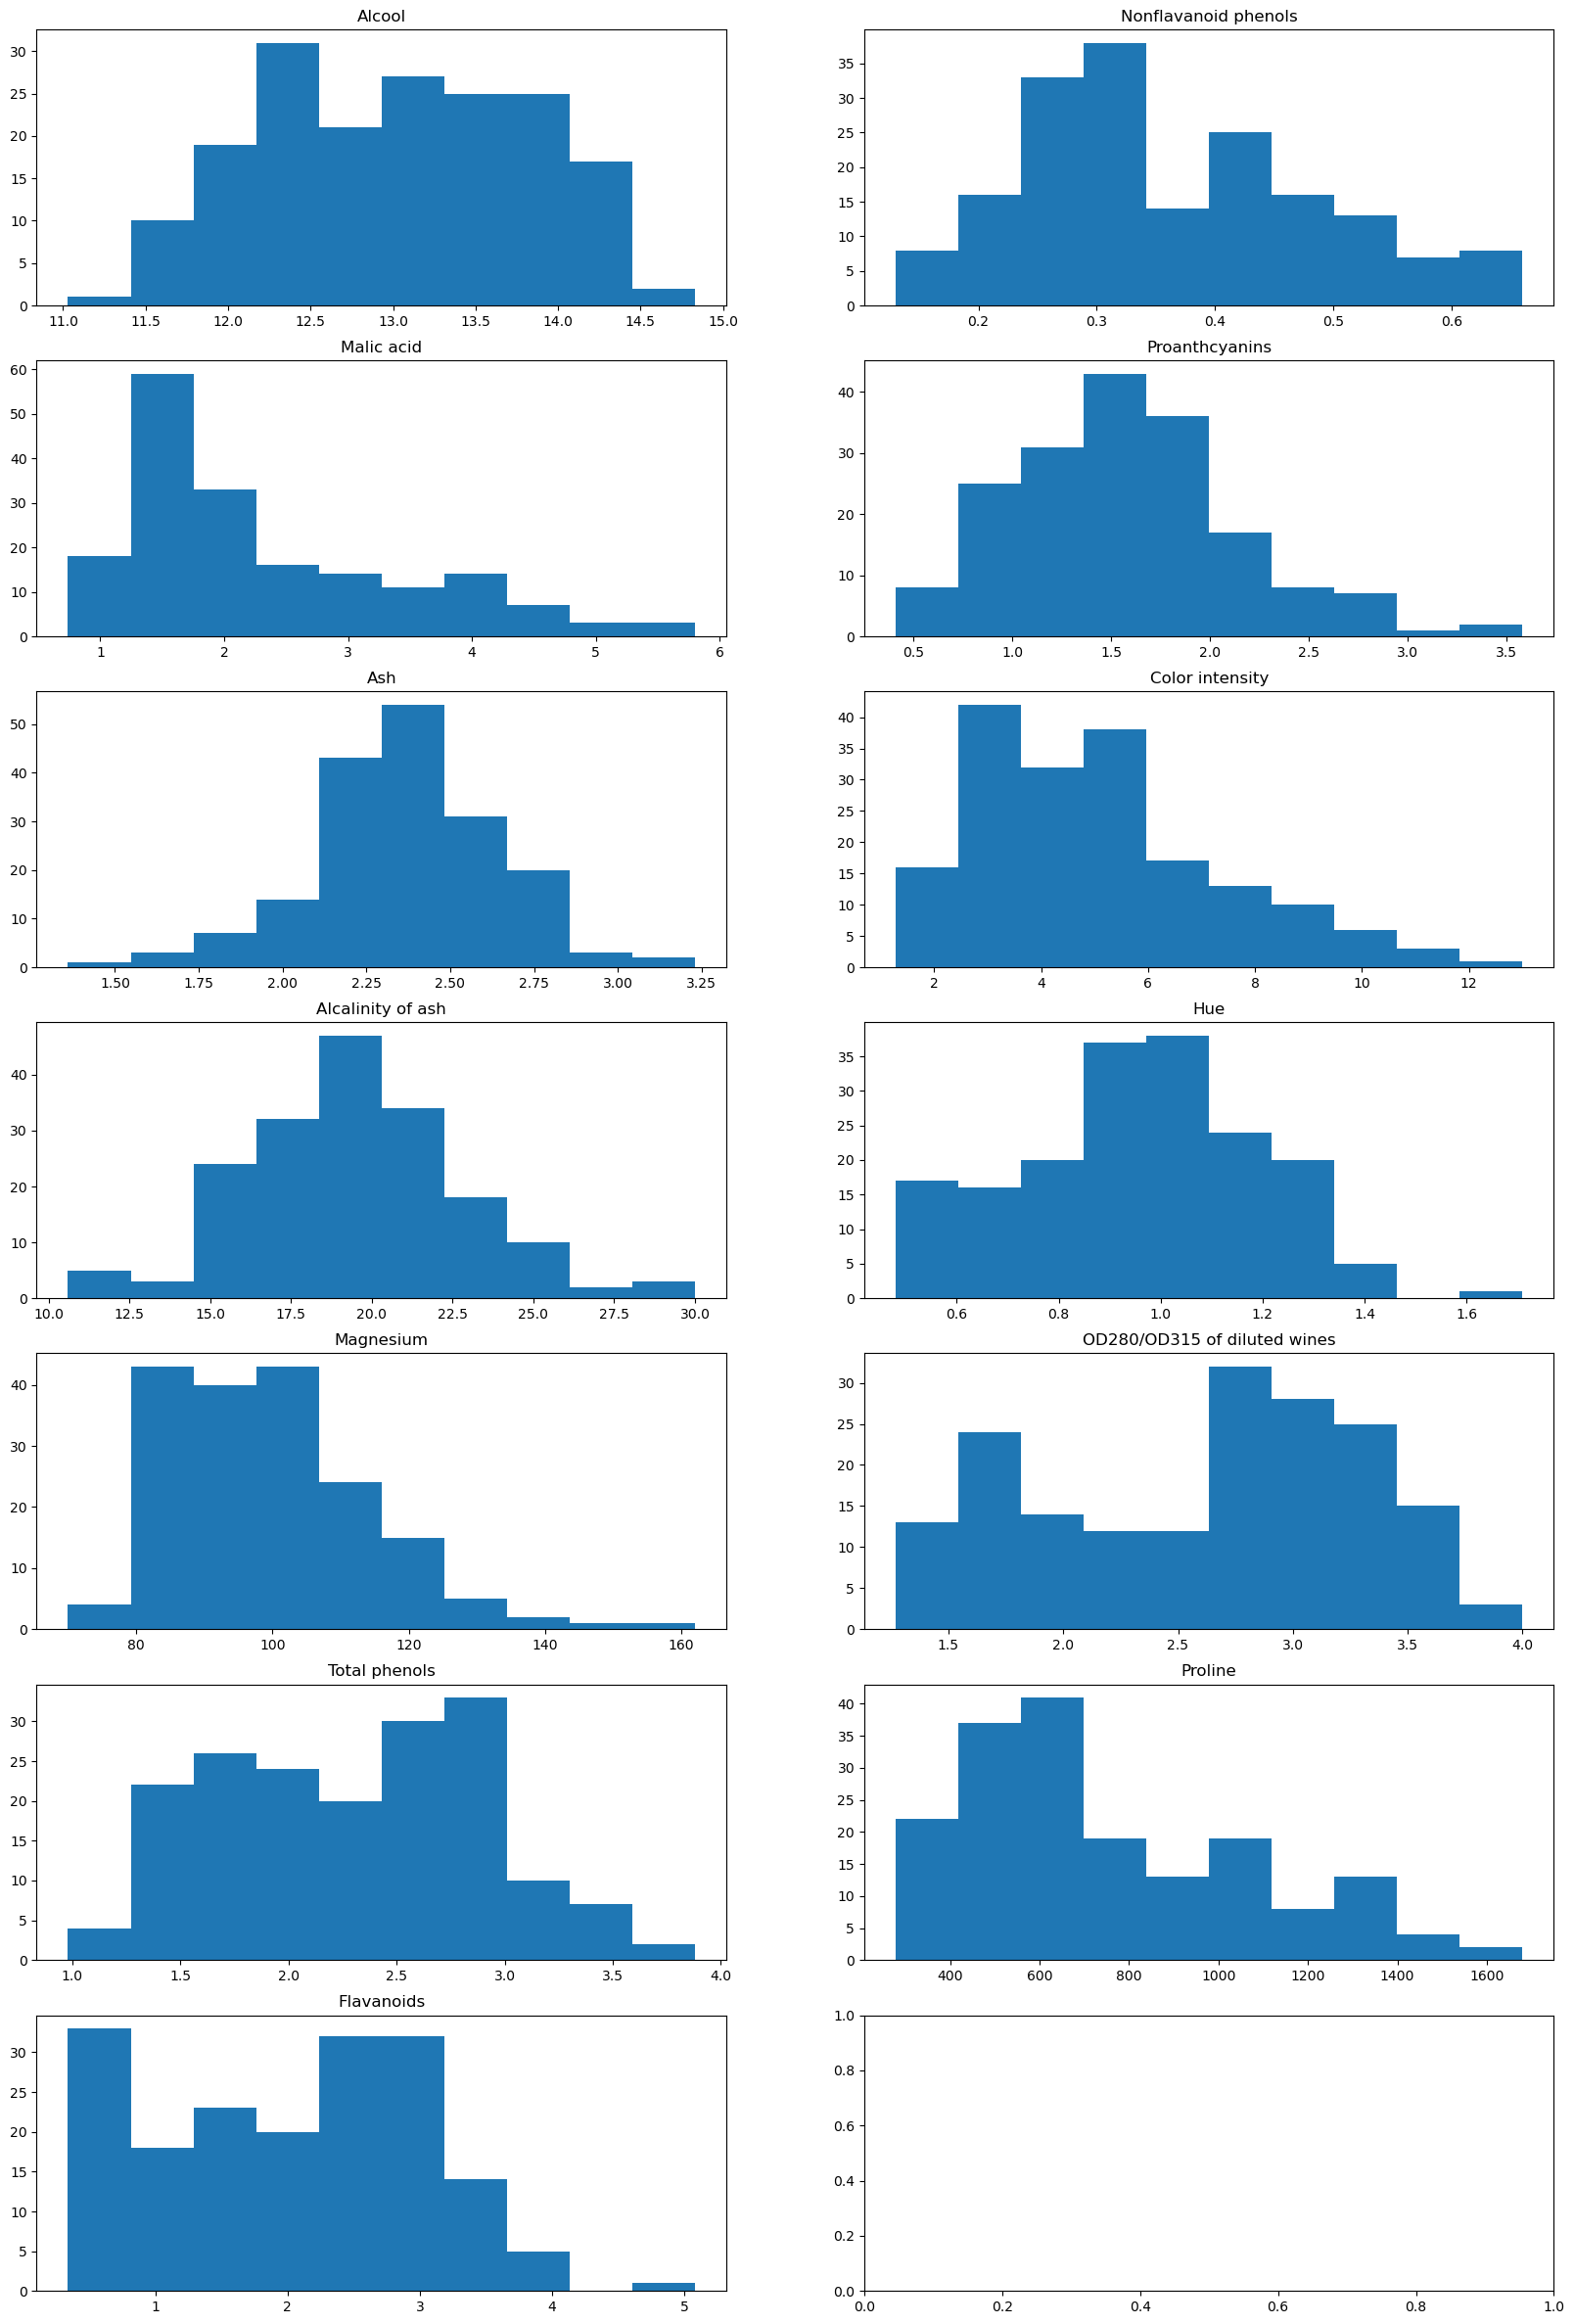

In [15]:
fig, ax = plt.subplots(figsize = (20, 30), nrows = 7, ncols = 2);

for i in 1:13
    ax[i].hist(Xc[: , Symbol(names(Xc)[i])])
    ax[i].set_title(names(Xc)[i])
end

savefig("./plots/4.3.1.png")

### Getting a baseline

---

It's a multiclass classification problem with continuous inputs so a sensible start is to test two very simple classifiers to get a baseline. We'll train two simple pipelines:

* a Standardizer + KNN classifier and

* a Standardizer + Multinomial classifier (logistic regression).

In [16]:
KNNC = @load KNNClassifier
MNC = @load MultinomialClassifier pkg = MLJLinearModels;

KnnPipe = Standardizer |> KNNC
MnPipe = Standardizer |> MNC

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import NearestNeighborModels ✔
import MLJLinearModels

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


 ✔


ProbabilisticPipeline(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    multinomial_classifier = MultinomialClassifier(
            lambda = 1.0,
            gamma = 0.0,
            penalty = :l2,
            fit_intercept = true,
            penalize_intercept = false,
            scale_penalty_with_samples = true,
            solver = nothing),
    cache = true)

Note the `|>` syntax, which is syntactic sugar for creating a linear `Pipeline` from components models.

We can now fit this on a train split of the data setting aside 20% of the data for eventual testing.

In [17]:
train, test = partition(collect(eachindex(yc)), 0.8, shuffle = true, rng = 111)
Xtrain = selectrows(Xc, train)
Xtest = selectrows(Xc, test)
ytrain = selectrows(yc, train)
ytest = selectrows(yc, test);

Let's now wrap an instance of these models with data (all hyperparameters are set to default here):

In [18]:
knn = machine(KnnPipe, Xtrain, ytrain)
multi = machine(MnPipe, Xtrain, ytrain)

Machine{ProbabilisticPipeline{NamedTuple{,…},…},…} trained 0 times; caches data
  model: MLJBase.ProbabilisticPipeline{NamedTuple{(:standardizer, :multinomial_classifier), Tuple{Unsupervised, Probabilistic}}, MLJModelInterface.predict}
  args: 
    1:	Source @952 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @525 ⏎ `AbstractVector{OrderedFactor{3}}`


Let's train a KNNClassifier with default hyperparameters and get a baseline misclassification rate using 90% of the training data to train the model and the remaining 10% to evaluate it:

In [19]:
opts = (resampling = Holdout(fraction_train = 0.9), measure = cross_entropy)
res = evaluate!(knn; opts...)
round(res.measurement[1], sigdigits = 3)

0.0159

Now we do the same with a MultinomialClassifier

In [20]:
res = evaluate!(multi; opts...)
round(res.measurement[1], sigdigits = 3)

0.143

Both methods seem to offer comparable levels of performance. Let's check the misclassification over the full training set:

In [21]:
mcr_k = misclassification_rate(predict_mode(knn, Xtrain), ytrain)
mcr_m = misclassification_rate(predict_mode(multi, Xtrain), ytrain)
println(rpad("KNN mcr: ", 10), round(mcr_k, sigdigits = 3))
println(rpad("MNC mcr: ", 10), round(mcr_m, sigdigits = 3))

KNN mcr:  0.0352
MNC mcr:  0.0423


So here we have done no hyperparameter training and already have a misclassification rate below 5%. Clearly the problem is not very difficult.

### Visualising the classes
---

One way to get intuition for why the dataset is so easy to classify is to project it onto a 2D space using the PCA and display the two classes to see if they are well separated; we use the arrow-syntax here (if you're on Julia <= 1.2, use the commented-out lines as you won't be able to use the arrow-syntax)

In [22]:
PCA = @load PCA
pca_pipe = Standardizer() |> PCA(maxoutdim = 2)
pca = machine(pca_pipe, Xtrain)
fit!(pca)
W = transform(pca, Xtrain)

import MLJMultivariateStatsInterface

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


 ✔


┌ Info: Training Machine{UnsupervisedPipeline{NamedTuple{,…},…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{PCA,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


,x1,x2
,Float64,Float64
1,-1.61545,-0.531419
2,-1.91617,-1.32584
3,1.31861,-2.15251
4,3.29083,2.5577
5,-3.33859,1.28375
6,4.26285,0.396268
7,2.38786,0.226407
8,2.27411,1.07861
9,-0.848608,-1.52987


Let's now display this using different colours for the different classes:

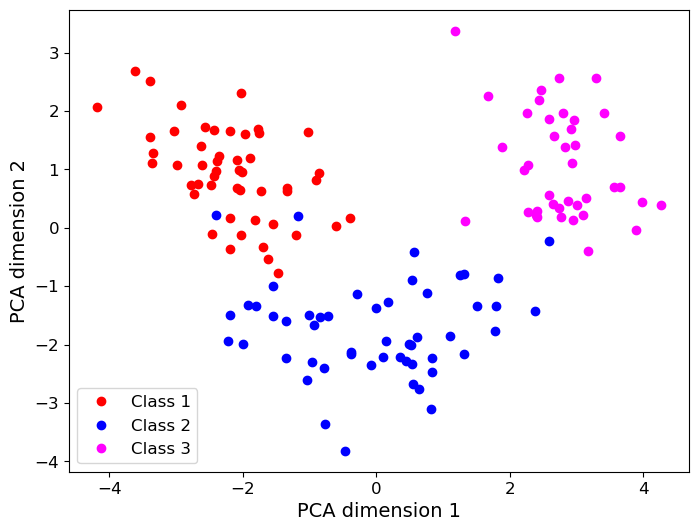

In [23]:
x1 = W.x1
x2 = W.x2

mask_1 = ytrain .== 1
mask_2 = ytrain .== 2
mask_3 = ytrain .== 3


figure(figsize=(8, 6))
plot(x1[mask_1], x2[mask_1], linestyle="none", marker = "o", color = "red")
plot(x1[mask_2], x2[mask_2], linestyle="none", marker = "o", color = "blue")
plot(x1[mask_3], x2[mask_3], linestyle="none", marker = "o", color = "magenta")

xlabel("PCA dimension 1", fontsize = 14)
ylabel("PCA dimension 2", fontsize = 14)
legend(["Class 1", "Class 2", "Class 3"], fontsize = 12)
xticks(fontsize = 12)
yticks(fontsize = 12)
savefig("./plots/4.3.2.png")

On that figure it now becomes quite clear why we managed to achieve such high scores with very simple classifiers. At this point it's a bit pointless to dig much deaper into parameter tuning etc.

As a last step, we can report performances of the models on the test set which we set aside earlier:

In [24]:
perf_k = misclassification_rate(predict_mode(knn, Xtest), ytest)
perf_m = misclassification_rate(predict_mode(multi, Xtest), ytest)
println(rpad("KNN mcr : ", 10), round(perf_k, sigdigits = 3))
println(rpad("MNC mcr : ", 10), round(perf_m, sigdigits = 3))

KNN mcr : 0.111
MNC mcr : 0.0833


Pretty good for so little work!